In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '..//')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from e2slib.utillib import dummy_data, functions
from src.data import manipulations, viz_schema, standard_data_process as sdp, data_preparation as dp
from e2slib.structures import enums, datetime_schema
from datetime import datetime
from src.visualization import visualize, viz_types
from pathlib import Path



In [3]:
demand = dummy_data.create_dummy_site_demand(2022)
carbon = dummy_data.generate_dummy_carbon_profile(2022)
price = dummy_data.generate_dummy_price_profile(2022)

demand_2 = dummy_data.create_dummy_site_demand(2021)

demand_two = pd.concat([demand_2, demand], axis=0)

save_path = Path(r'/Users/rhysjones/Library/CloudStorage/GoogleDrive-rhys.jones@e2s.energy/Shared drives/e2s-softwares/Lyra/08 - Customers/06 - Bender/02 - Ressources/03 - Test data (EVs + Chargers)/submeter_data.csv')
bender_submeters = pd.read_csv(save_path, index_col=0, parse_dates=True)


In [4]:
df = functions.add_time_features(demand)

In [5]:
df = manipulations.create_seasonal_average_week(enums.Season.SUMMER, df)

In [6]:
import plotly.express as px

# df = px.data.gapminder().query("country=='Canada'")
df = manipulations.EquationManipulator().data_formatter(df, 'Site energy [kWh]', '* 2', 'Site power [kW]')

fig = px.bar(df, y=["Site energy [kWh]"], title='Site demand for a week', color=df.index) #, color=df.index
fig.show()


In [7]:
data = {'A': [10, 15, 12, 14, 20, 8, 11, 13, 16, 5, 1000, 10, 15, 12, 14, 20, 8, 11, 13, 16, 5, 1000, 10, 15, 12, 14, 20, 8, 11, 13, 16, 5, 1000, 20, 8, 11, 13, 16, 5, 1000, 10, 15, 12, 14, 20, 8, 11, 13, 16, 5, 1000],
        'B': [50, 55, 52, 54, 60, 48, 51, 53, 56, 45, 2000, 50, 55, 52, 54, 60, 48, 51, 53, 56, 45, 2000, 50, 55, 52, 54, 60, 48, 51, 53, 56, 45, 2000, 60, 48, 51, 53, 56, 45, 2000, 50, 55, 52, 54, 60, 48, 51, 53, 56, 45, 2000],
        'C': [100, 150, 120, 140, 200, 80, 110, 130, 160, 50, 300, 100, 150, 120, 140, 200, 80, 110, 130, 160, 50, 300, 100, 150, 120, 140, 200, 80, 110, 130, 160, 50, 300, 200, 80, 110, 130, 160, 50, 300, 100, 150, 120, 140, 200, 80, 110, 130, 160, 50, 300]}

df = pd.DataFrame(data)

# Add outliers
df.loc[3, 'A'] = 500
df.loc[6, 'B'] = 3000
df.loc[9, 'C'] = 5000

demand_array = np.array(df)

In [8]:
dp.check_dataset(demand)

{'outliers': False, 'nan values': False, 'timeseries': True}

In [45]:
df_2 = dp.GenerateDatetime(freq='D').data_cleaner(df)
pd.infer_freq(demand.index)

'30T'

In [49]:
test = sdp.RunVisualisationPreparator(demand, 
                                      dp.check_dataset, 
                                      dp.OutlierRemover().data_cleaner, 
                                      dp.FillMissingData(), 
                                      dp.GenerateDatetime(),
                                      manipulations.statistics_of_data
                                      )
bender_submeters = test._data

In [50]:
test._data

,Site energy [kWh]
2022-01-01 00:00:00+00:00,10
2022-01-01 00:30:00+00:00,1
2022-01-01 01:00:00+00:00,0
2022-01-01 01:30:00+00:00,4
2022-01-01 02:00:00+00:00,3
...,...
2022-12-31 21:30:00+00:00,7
2022-12-31 22:00:00+00:00,10
2022-12-31 22:30:00+00:00,2
2022-12-31 23:00:00+00:00,5


In [51]:
test._described_data

,Site energy [kWh]
Count,17520.000000
Mean,11.829737
StD,11.071467
Min,0.000000
1%,0.000000
25%,4.000000
50%,8.000000
75%,18.000000
99%,40.000000
Max,40.000000


# Data preparation
### Describe

In [14]:
dp.describe_data(demand)

,Site energy [kWh]
count,17520.000000
mean,11.829737
std,11.071467
min,0.000000
25%,4.000000
50%,8.000000
75%,18.000000
max,40.000000


### Outlier remover

In [15]:
# print(df)
outlier_remover = dp.OutlierRemover()
outliers_removed_df = outlier_remover.data_cleaner(df)

print("\nDataFrame with outliers removed:")
outliers_removed_df.head()


DataFrame with outliers removed:


,A,B,C
0,10.0,50.0,100.0
1,15.0,55.0,150.0
2,12.0,52.0,120.0
3,NaN,54.0,140.0
4,20.0,60.0,200.0


### Missing data filler

In [16]:
fillMissing = dp.FillMissingData()
filled_na_df = fillMissing.data_cleaner(outliers_removed_df)
filled_na_df.head()

,A,B,C
0,10.0,50.0,100.0
1,15.0,55.0,150.0
2,12.0,52.0,120.0
3,13.5,54.0,140.0
4,20.0,60.0,200.0


### Generate datetime column/index

In [17]:
addDatetime = dp.GenerateDatetime(freq='W').data_cleaner(filled_na_df)
addDatetime.head()

,A,B,C
2022-01-02 00:00:00+00:00,10.0,50.0,100.0
2022-01-09 00:00:00+00:00,15.0,55.0,150.0
2022-01-16 00:00:00+00:00,12.0,52.0,120.0
2022-01-23 00:00:00+00:00,13.5,54.0,140.0
2022-01-30 00:00:00+00:00,20.0,60.0,200.0


# Manipulators

### Resampler

In [18]:
resampled_data = manipulations.ResampleManipulator().data_formatter(addDatetime, 'M', 'sum')
resampled_data.head()

,A,B,C
2022-01-31 00:00:00+00:00,70.5,271.0,710.0
2022-02-28 00:00:00+00:00,48.0,211.0,480.0
2022-03-31 00:00:00+00:00,40.5,200.5,555.0
2022-04-30 00:00:00+00:00,54.0,214.0,540.0
2022-05-31 00:00:00+00:00,55.5,255.5,555.0


### Groupby

Np.array version not working properly

In [19]:
demand_with_time = functions.add_time_features(demand)

In [20]:
manipulations.GroupbyManipulator().data_formatter(demand_with_time, groupby=['Weekday flag'], agg='mean', target='Site energy [kWh]')

,Site energy [kWh]
Weekday flag,
weekday,14.575801
weekend,5.029960


### Apply equation

In [21]:
equationed_df = manipulations.EquationManipulator().data_formatter(demand_with_time, 'Site energy [kWh]', '* 8', 'A*8')
equationed_df.head()

,Site energy [kWh],Hour,Day of week,Day of year,Month,Year,Weekday flag,Half-hour,Date,Week,season,season_number,A*8
2022-01-01 00:00:00+00:00,10,0,5,1,1,2022,weekend,0,2022-01-01,52,WINTER,1,80
2022-01-01 00:30:00+00:00,1,0,5,1,1,2022,weekend,1,2022-01-01,52,WINTER,1,8
2022-01-01 01:00:00+00:00,0,1,5,1,1,2022,weekend,2,2022-01-01,52,WINTER,1,0
2022-01-01 01:30:00+00:00,4,1,5,1,1,2022,weekend,3,2022-01-01,52,WINTER,1,32
2022-01-01 02:00:00+00:00,3,2,5,1,1,2022,weekend,4,2022-01-01,52,WINTER,1,24


### Seasonal Week extractor

Only currently works on 30 minute interval data due to hard coding. This is because if we are trying to plot one weeks data it needs to be a complete week otherwise the plots won't look right.

In [22]:
new_test_arr_to_df = manipulations.get_seasonal_week(demand)
winter_week_demand = demand.loc[demand.index.isin(new_test_arr_to_df[0].index)]
spring_week_demand = demand.loc[demand.index.isin(new_test_arr_to_df[1].index)]
summer_week_demand = demand.loc[demand.index.isin(new_test_arr_to_df[2].index)]
autumn_week_demand = demand.loc[demand.index.isin(new_test_arr_to_df[3].index)]

# Plotting
### Annual plot

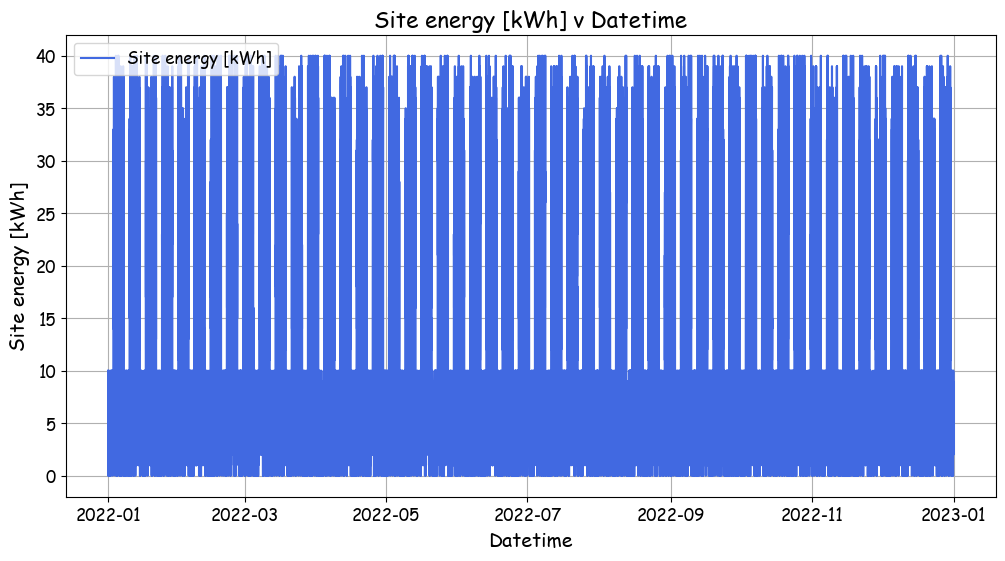

In [23]:
visualize.Visualizer(demand, viz_type=viz_types.StandardPlot()).plot_plt()

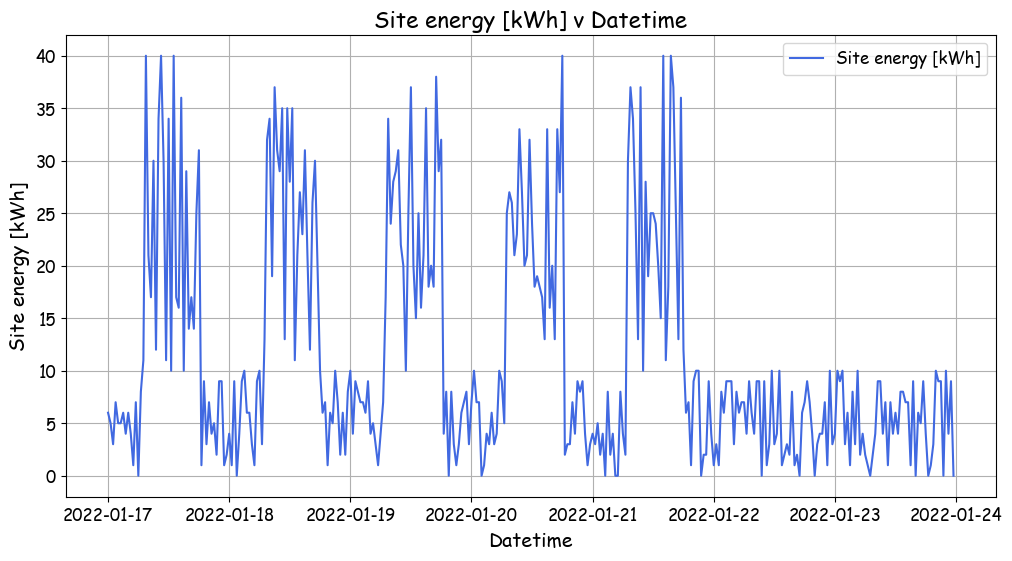

In [24]:
visualize.Visualizer(winter_week_demand, viz_type=viz_types.StandardPlot()).plot_plt()

### Power Energy

In [25]:
winter_week_demand_p_e = manipulations.EquationManipulator().data_formatter(winter_week_demand, 'Site energy [kWh]', '* 2', 'Site power [kW]')

In [26]:
winter_week_arr = np.array(winter_week_demand_p_e)

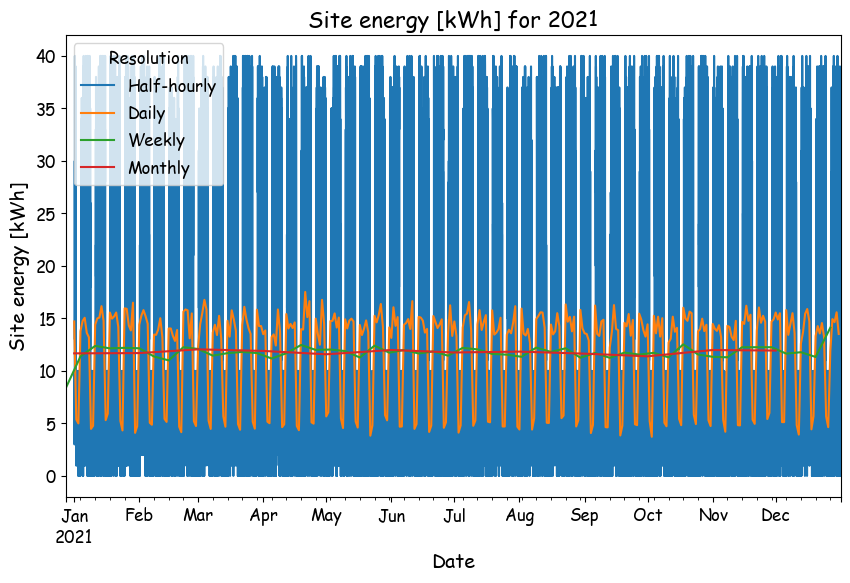

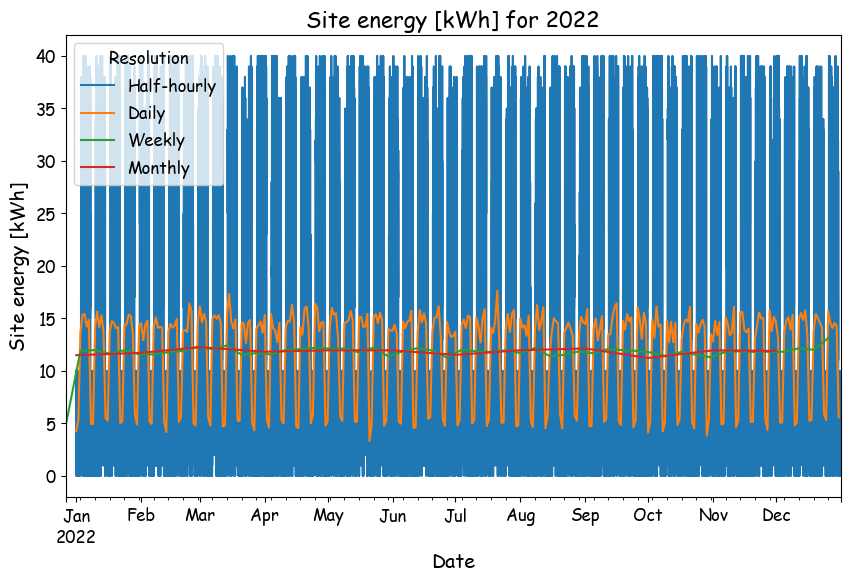

In [27]:
visualize.Visualizer(demand_two, viz_type=viz_types.AnnualPlot()).plot_plt()

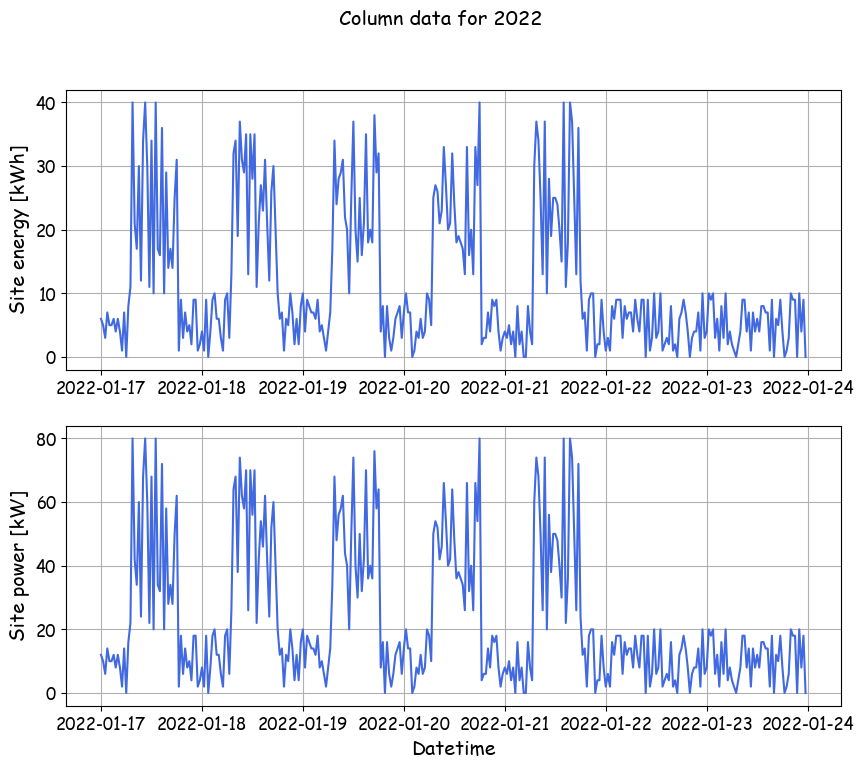

In [28]:
visualize.Visualizer(winter_week_demand_p_e, viz_type=viz_types.SubplotPlot()).plot_plt()

In [29]:
new_test_arr_to_df = manipulations.get_seasonal_week(bender_submeters)
bender_winter_week_demand = bender_submeters.loc[bender_submeters.index.isin(new_test_arr_to_df[0].index)]

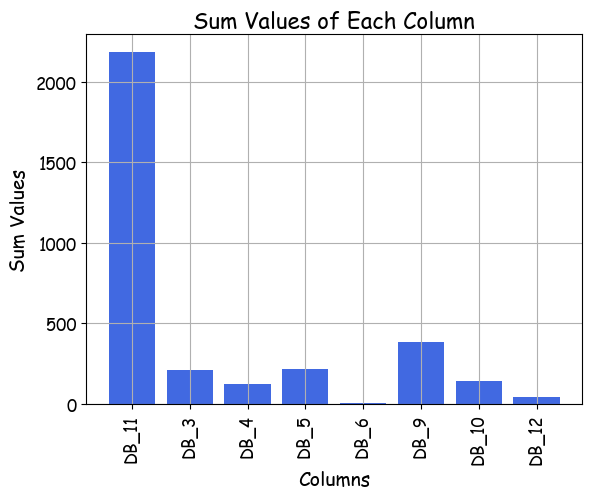

In [30]:
visualize.Visualizer(bender_winter_week_demand, viz_type=viz_types.BarPlot()).plot_plt()

In [31]:
described = visualize.Visualizer(bender_submeters, viz_type=viz_types.DataDescriber())
described.plot_plt()
described.viz_type._describe

                 DB_11          DB_3          DB_4          DB_5  \
Count     17112.000000  16517.000000  15711.000000  17290.000000   
Mean          3.805773      0.739440      0.381676      0.636391   
StD           3.644459      0.195731      0.684621      0.073108   
Min           0.238472      0.430443      0.035838      0.453167   
1%            0.312715      0.474627      0.036785      0.498007   
25%           0.753308      0.609711      0.038516      0.580576   
50%           2.283643      0.672238      0.039700      0.668633   
75%           5.865662      0.801100      0.210499      0.685872   
99%          13.682942      1.272597      2.453332      0.831257   
Max          14.340929      1.293525      2.487921      0.844604   
Range        14.102457      0.863082      2.452083      0.391437   
Sum       65124.394249  12213.328387   5996.519461  11003.200646   
Variance     13.282083      0.038311      0.468706      0.005345   
Skewness      1.077302      1.246812      2.0286

,DB_11,DB_3,DB_4,DB_5,DB_6,DB_9,DB_10,DB_12
Count,17112.000000,16517.000000,15711.000000,17290.000000,14278.000000,16208.000000,14780.000000,14299.000000
Mean,3.805773,0.739440,0.381676,0.636391,0.025303,1.207847,0.512669,0.200282
StD,3.644459,0.195731,0.684621,0.073108,0.002762,0.081115,0.145167,0.392810
Min,0.238472,0.430443,0.035838,0.453167,0.018273,1.058588,0.364034,0.039552
1%,0.312715,0.474627,0.036785,0.498007,0.018628,1.060533,0.384125,0.039984
25%,0.753308,0.609711,0.038516,0.580576,0.024637,1.188976,0.414321,0.045704
50%,2.283643,0.672238,0.039700,0.668633,0.025536,1.224000,0.466944,0.048246
75%,5.865662,0.801100,0.210499,0.685872,0.026075,1.269091,0.547884,0.051899
99%,13.682942,1.272597,2.453332,0.831257,0.034363,1.308363,1.070139,1.926425
Max,14.340929,1.293525,2.487921,0.844604,0.035284,1.399085,1.121479,2.178252


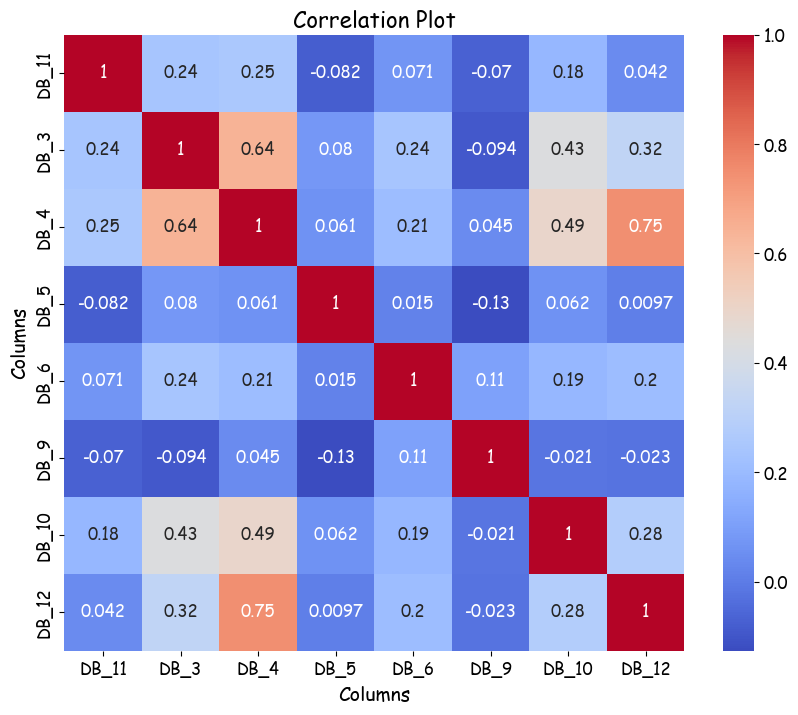

In [32]:
visualize.Visualizer(bender_submeters, viz_type=viz_types.CorrelationPlot()).plot_plt()

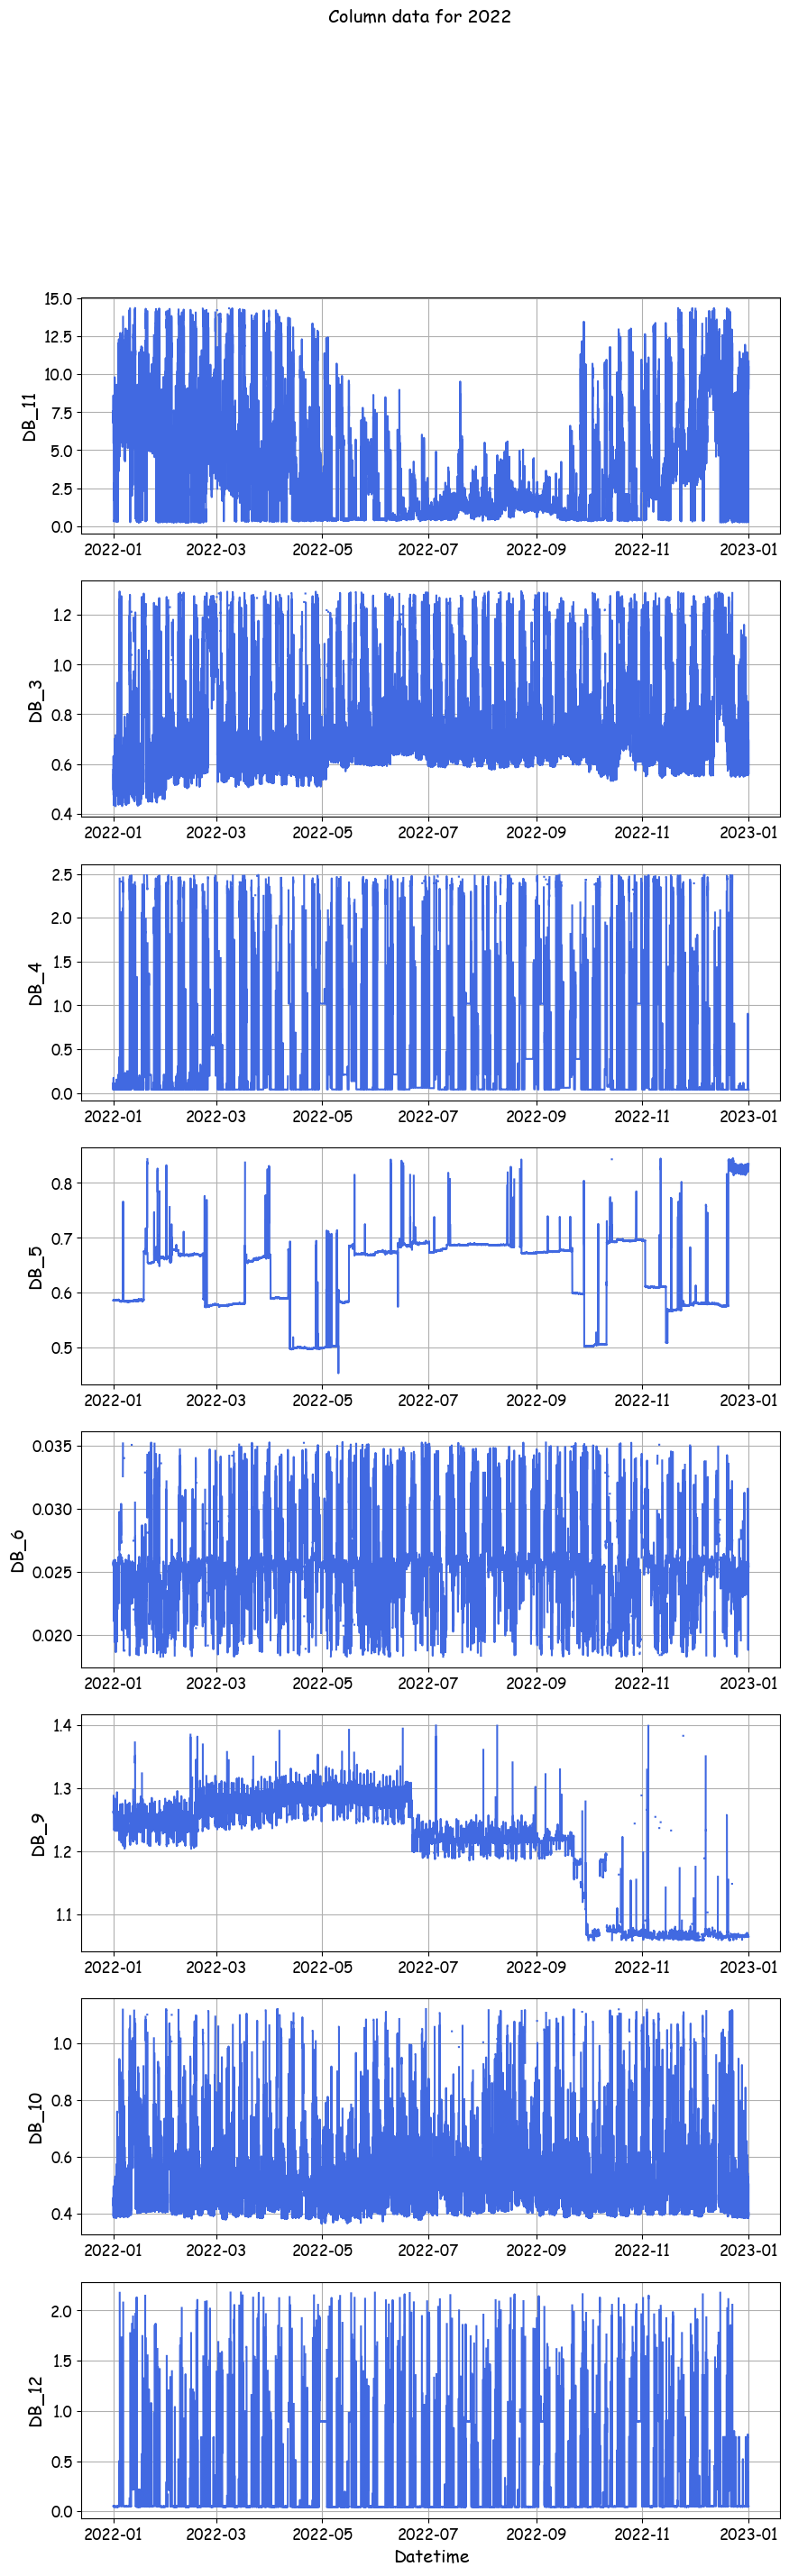

In [33]:
visualize.Visualizer(bender_submeters, viz_type=viz_types.SubplotPlot()).plot_plt()

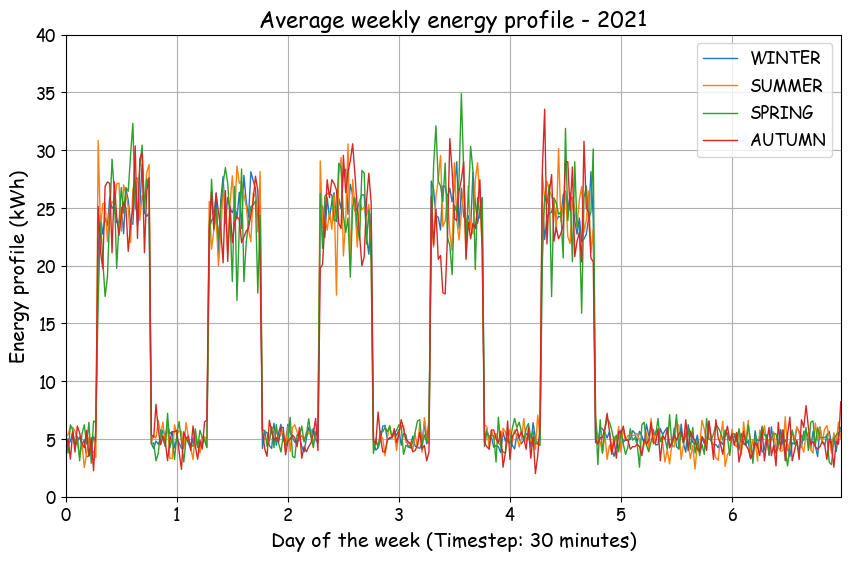

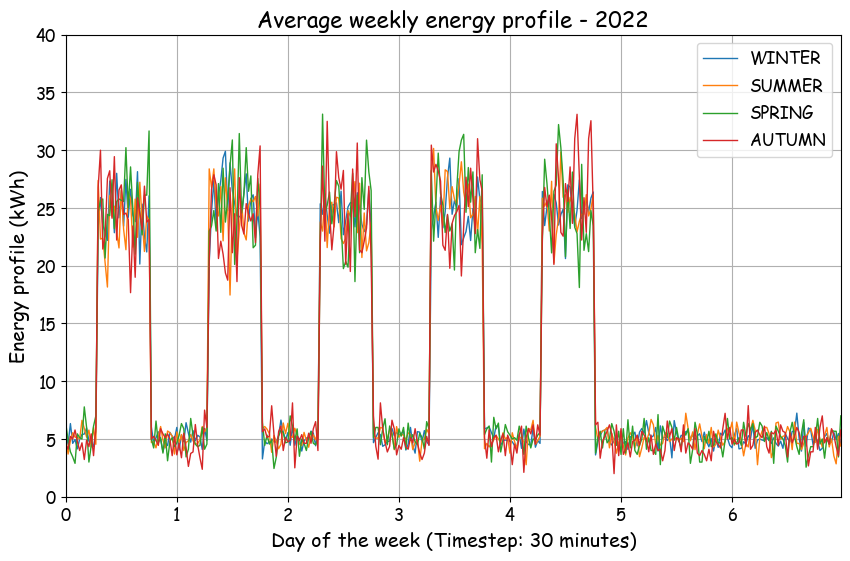

In [34]:
visualize.Visualizer(demand_two, viz_types.AnnualSeasonalWeekPlot()).plot_plt()

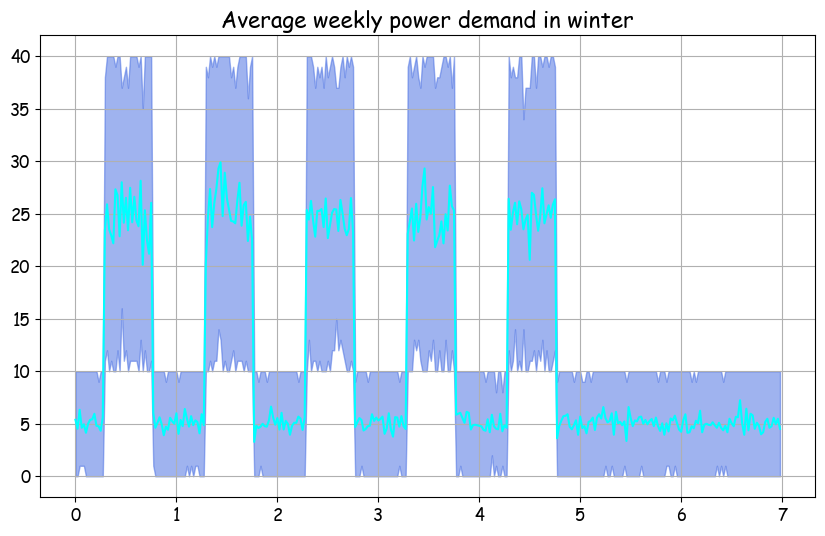

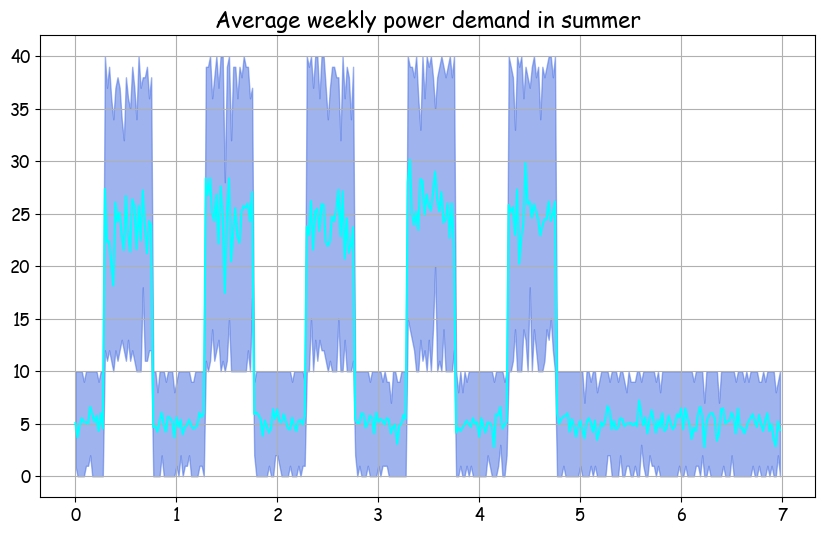

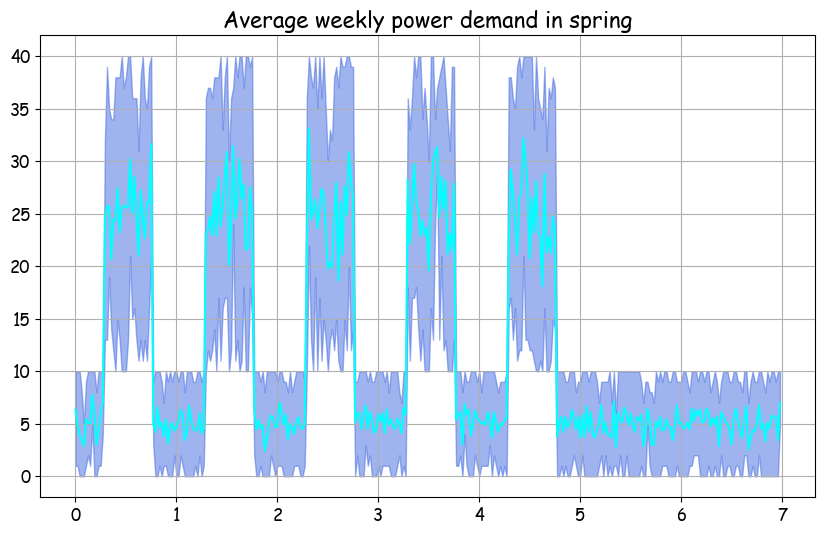

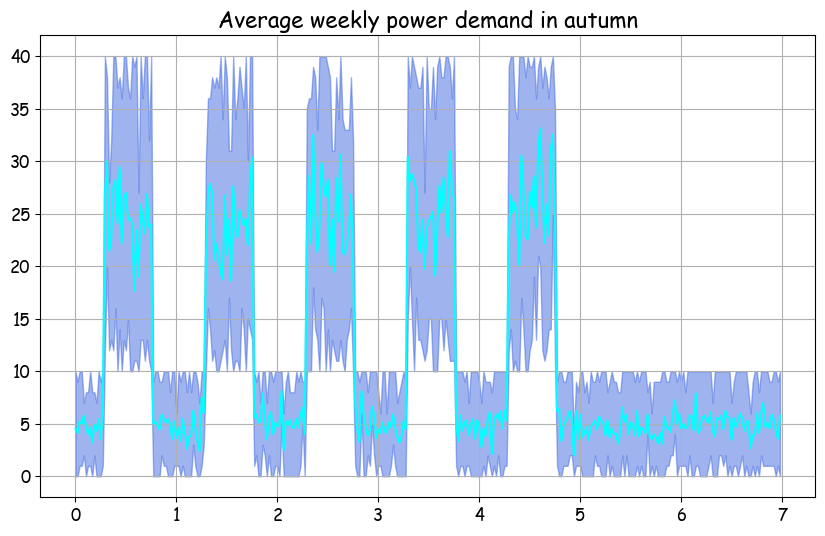

In [35]:
visualize.Visualizer(demand, viz_type=viz_types.AvgSeasonWeekPlot()).plot_plt() 

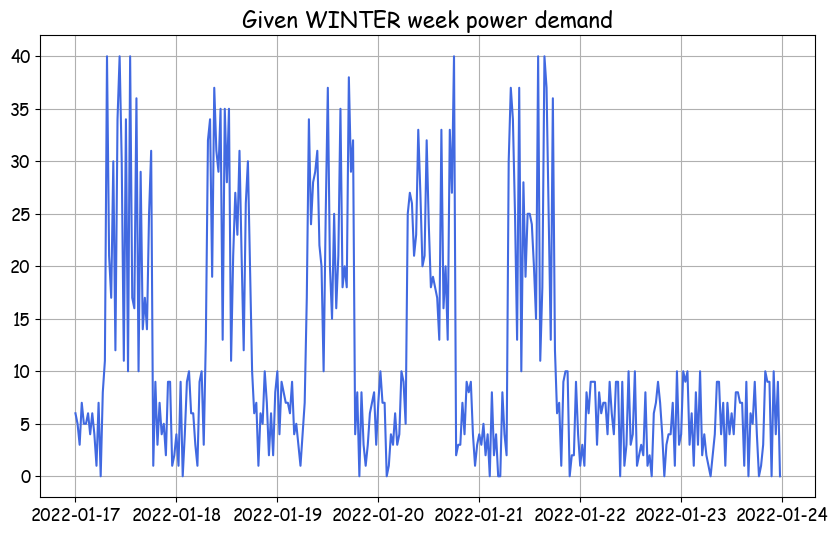

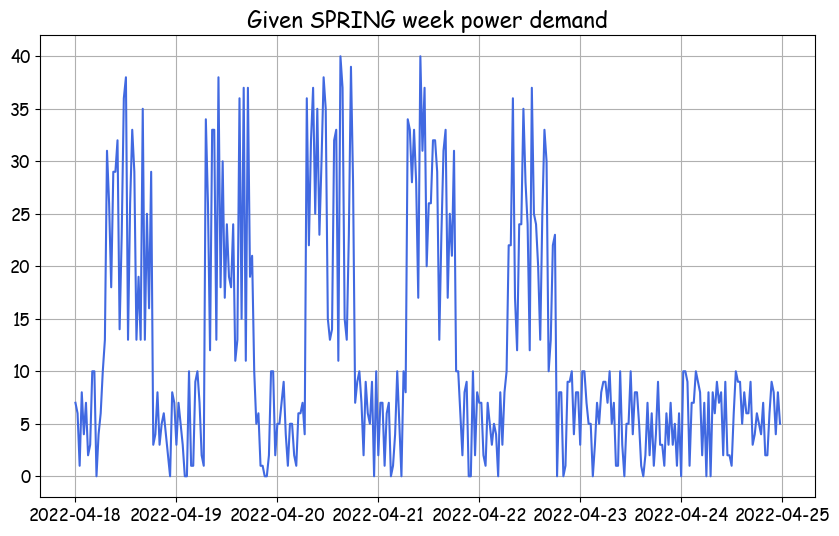

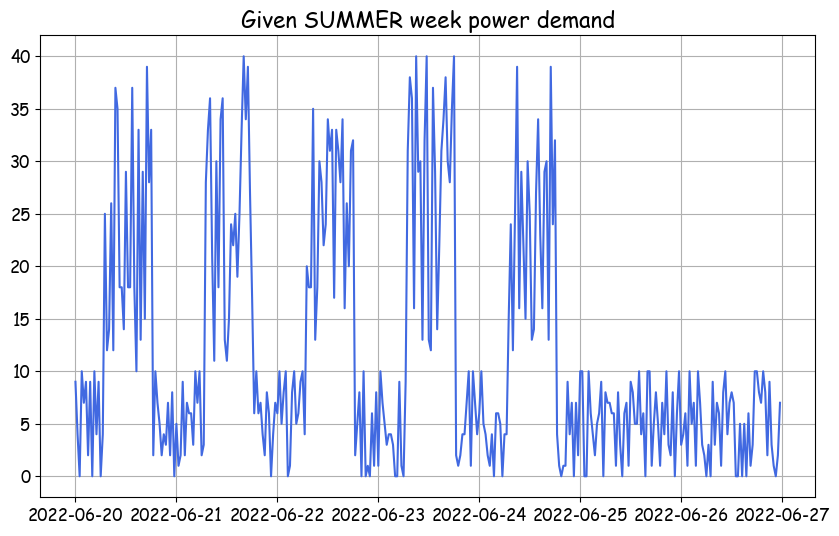

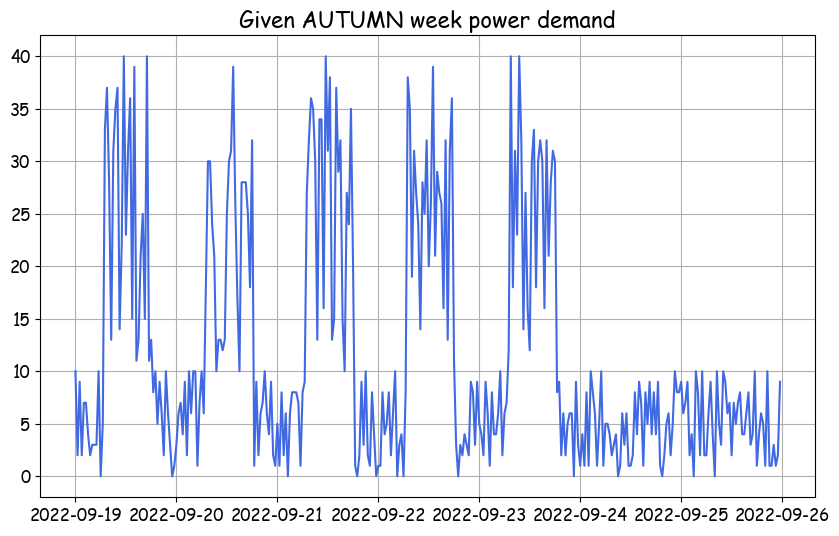

In [36]:
visualize.Visualizer(demand, viz_types.ActualSeasonWeekPlot()).plot_plt()